In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('cleaned_AERO_BirdsEye_Categorized.csv')

In [3]:
print(df.dtypes)


index                   int64
NCT                    object
Sponsor                object
Title                  object
Summary                object
Start_Year              int64
Start_Month             int64
Phase                  object
Enrollment              int64
Status                 object
Condition              object
clean_title            object
clean_summary          object
combined_text          object
Trial_Category         object
Enrollment_Category    object
dtype: object


In [4]:
# Count trials per year
trials_per_year = df["Start_Year"].value_counts().sort_index()  


In [5]:
print(trials_per_year)

Start_Year
1984       1
1985       1
1988       3
1989       3
1990       3
1991       2
1992       9
1993      11
1994       4
1995      16
1996      12
1997      35
1998      46
1999      70
2000     112
2001     215
2002     380
2003     600
2004     787
2005     896
2006    1094
2007    1099
2008    1068
2009     956
2010     898
2011     852
2012     788
2013     721
2014     636
2015     633
2016     517
2017     459
2018     508
2019      48
2020       2
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

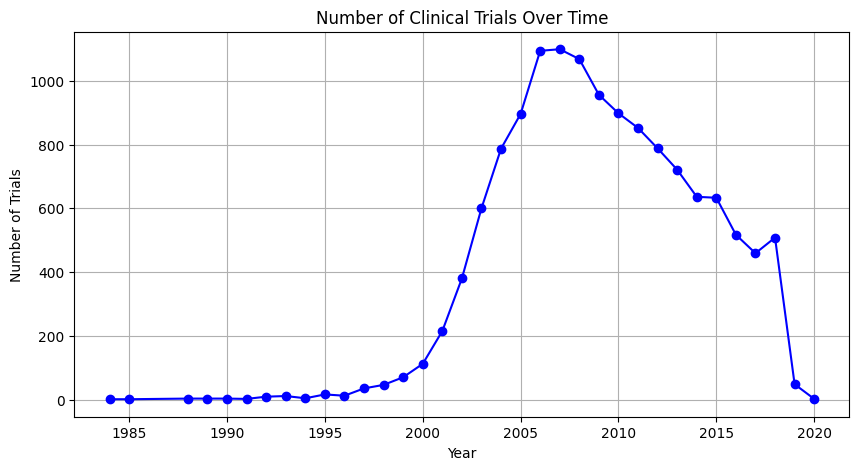

In [6]:
#plot trend
plt.figure(figsize=(10,5))
plt.plot(trials_per_year.index, trials_per_year.values, marker="o", linestyle="-", color="b")
plt.xlabel("Year")
plt.ylabel("Number of Trials")
plt.title("Number of Clinical Trials Over Time")
plt.grid(True)
plt.show

In [7]:
# Group by year and calculate total enrollment
total_enrollment_per_year = df.groupby("Start_Year")["Enrollment"].sum()

In [8]:
print(total_enrollment_per_year)

Start_Year
1984       604
1985       270
1988       468
1989       163
1990       364
1991       553
1992      1380
1993      3904
1994       612
1995      9350
1996     16196
1997     13958
1998     36722
1999     37588
2000     57102
2001    213149
2002    301604
2003    480065
2004    363349
2005    324023
2006    476587
2007    526388
2008    478365
2009    356695
2010    330084
2011    350336
2012    268087
2013    272306
2014    225920
2015    187126
2016    170524
2017    131763
2018    175375
2019      9713
2020       114
Name: Enrollment, dtype: int64


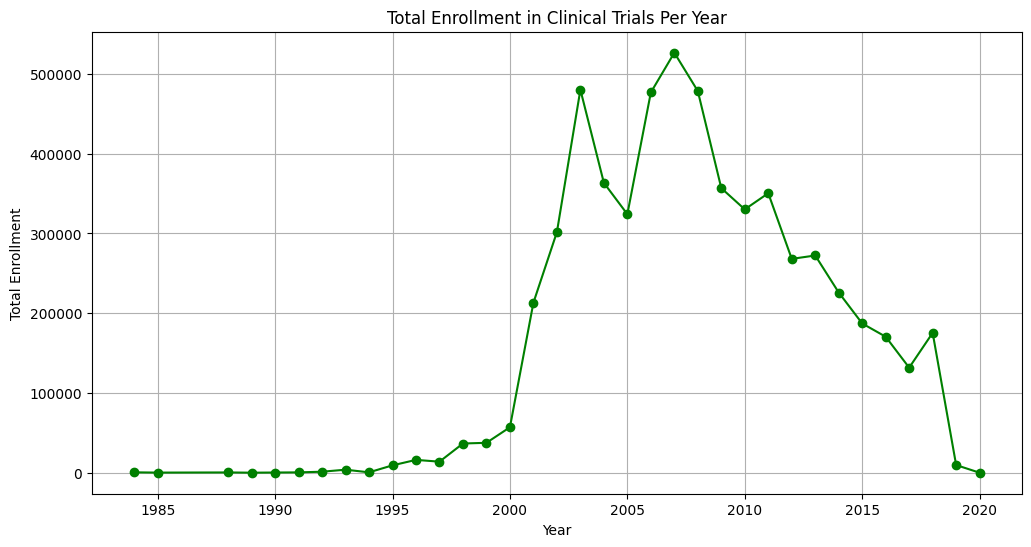

In [9]:
# Plot total enrollment trend
plt.figure(figsize=(12, 6))  
plt.plot(total_enrollment_per_year.index, total_enrollment_per_year.values, marker="o", linestyle="-", color="g")  
plt.xlabel("Year")  
plt.ylabel("Total Enrollment")  
plt.title("Total Enrollment in Clinical Trials Per Year")  
plt.grid(True)  
plt.show()

In [10]:
avg_enrollment_per_year = total_enrollment_per_year / trials_per_year
avg_enrollment_per_year = avg_enrollment_per_year.round().astype(int)


In [11]:
print(avg_enrollment_per_year)

Start_Year
1984     604
1985     270
1988     156
1989      54
1990     121
1991     276
1992     153
1993     355
1994     153
1995     584
1996    1350
1997     399
1998     798
1999     537
2000     510
2001     991
2002     794
2003     800
2004     462
2005     362
2006     436
2007     479
2008     448
2009     373
2010     368
2011     411
2012     340
2013     378
2014     355
2015     296
2016     330
2017     287
2018     345
2019     202
2020      57
dtype: int32


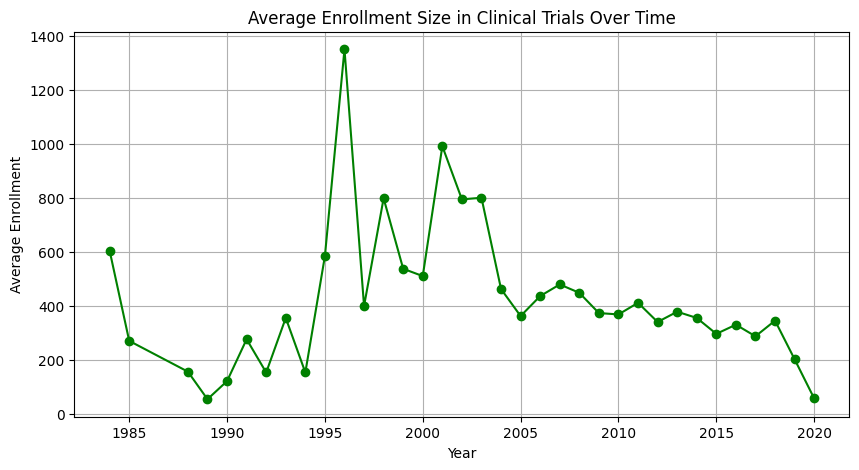

In [12]:
# Plot trend
plt.figure(figsize=(10, 5))
plt.plot(avg_enrollment_per_year.index, avg_enrollment_per_year.values, marker="o", linestyle="-", color="g")
plt.xlabel("Year")
plt.ylabel("Average Enrollment")
plt.title("Average Enrollment Size in Clinical Trials Over Time")
plt.grid(True)
plt.show()

In [13]:
# Count trials by phase
phase_counts = df["Phase"].value_counts()

In [14]:
print(phase_counts)

Phase
Phase 3            4887
Phase 2            3596
Phase 1            2516
Phase 4            2015
Phase 1/Phase 2     322
Phase 2/Phase 3     139
Early Phase 1        10
Name: count, dtype: int64


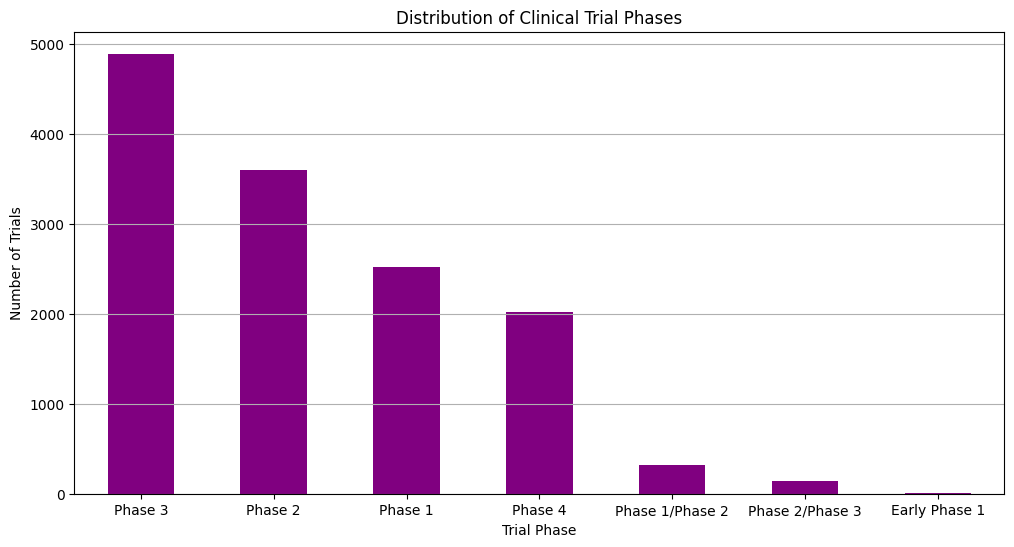

In [15]:
#plot bar chart
plt.figure(figsize = (12,6))
phase_counts.plot(kind="bar", color="purple")
plt.xlabel("Trial Phase")
plt.ylabel("Number of Trials")
plt.title("Distribution of Clinical Trial Phases")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

In [16]:
unique_conditions = df["Condition"].nunique()
print(f"Number of unique conditions: {unique_conditions}")

Number of unique conditions: 852


In [17]:
#Count most common conditions
top_conditions = df["Condition"].value_counts().head(10) #Top 10 Conditions

In [18]:
print(top_conditions)

Condition
Diabetes Mellitus, Type 2                 529
Breast Neoplasms                          388
Hypertension                              338
Pulmonary Disease, Chronic Obstructive    336
Asthma                                    331
Arthritis, Rheumatoid                     329
Influenza, Human                          323
Schizophrenia                             290
Diabetes Mellitus                         262
Alzheimer Disease                         214
Name: count, dtype: int64


In [19]:
import textwrap

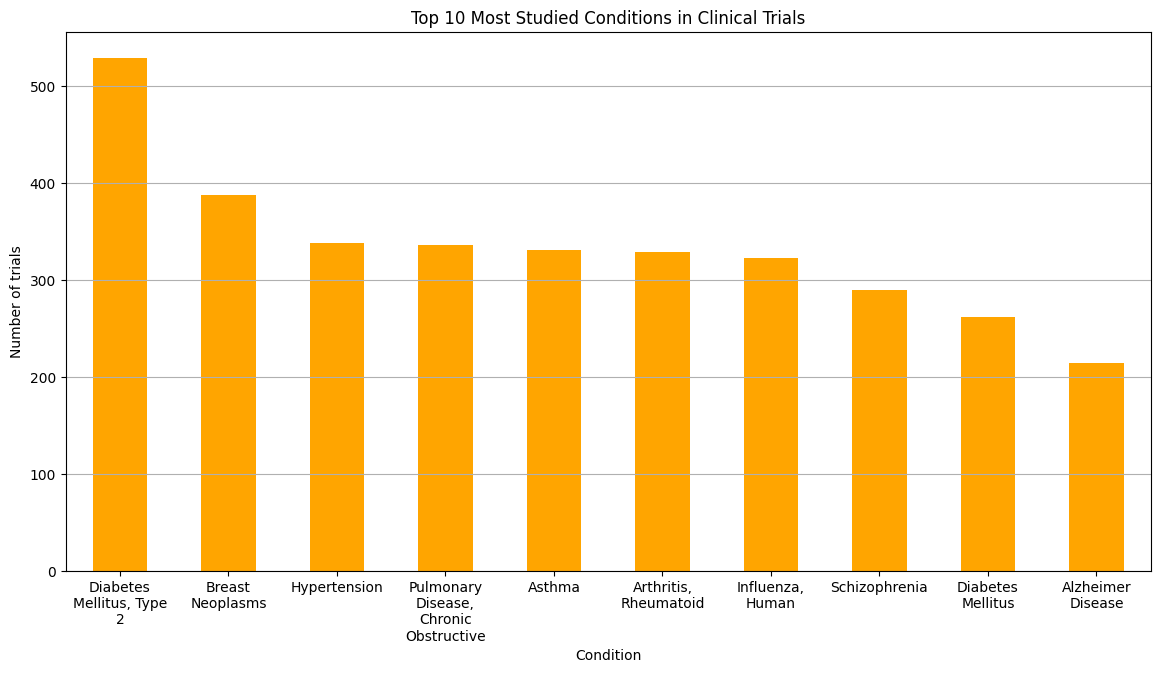

In [20]:
#plot bar chart

# Wrap long condition names
wrapped_labels = [textwrap.fill(label, width=15) for label in top_conditions.index]

plt.figure(figsize=(14,7))
top_conditions.plot(kind ="bar", color="orange")
plt.xlabel("Condition")
plt.ylabel("Number of trials")
plt.title("Top 10 Most Studied Conditions in Clinical Trials")

# Apply wrapped labels to x-ticks
plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=0, ha="center", fontsize=10)


plt.grid(axis="y")
plt.show()

In [21]:
#count trial statuses
status_counts = df["Status"].value_counts()

In [22]:
print(status_counts)

Status
Completed                  10350
Terminated                  1265
Recruiting                   788
Active, not recruiting       641
Withdrawn                    286
Not yet recruiting           107
Unknown status                17
Suspended                     16
Enrolling by invitation       15
Name: count, dtype: int64


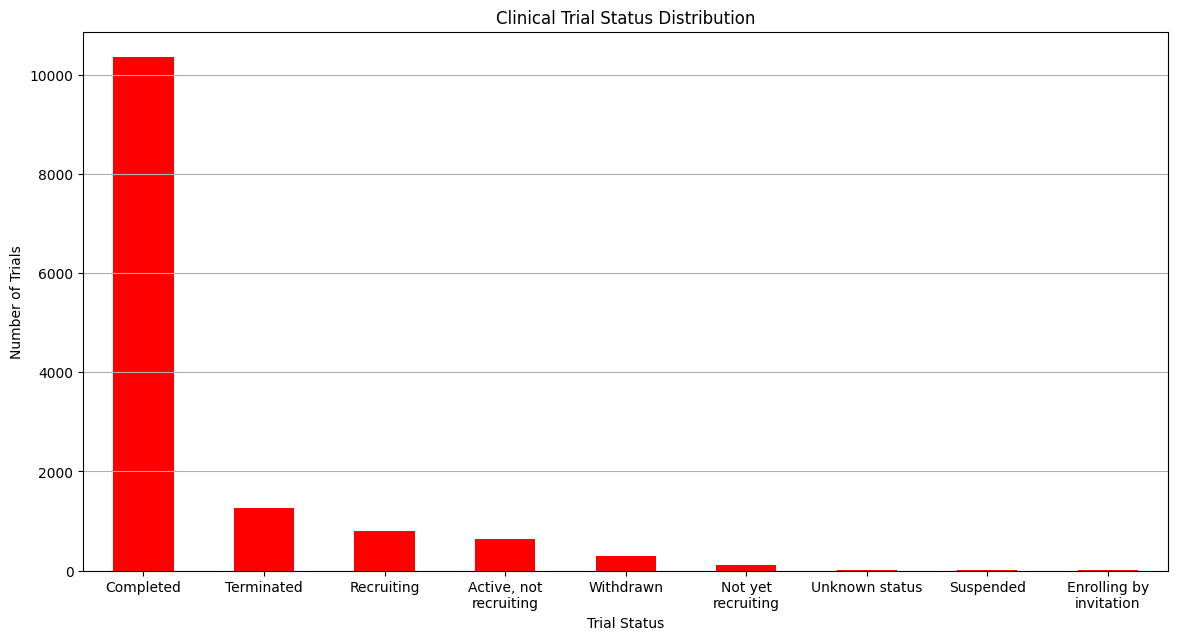

In [23]:
#plot bar chart
wrapped_labels = [textwrap.fill(label, width=15) for label in status_counts.index]

plt.figure(figsize=(14,7))
status_counts.plot(kind="bar", color="red")
plt.xlabel("Trial Status")
plt.ylabel("Number of Trials")
plt.title("Clinical Trial Status Distribution")
plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=0, ha="center", fontsize=10)
plt.grid(axis="y")
plt.show()

In [24]:
df["Sponsor"].unique()

array(['Sanofi', 'Pfizer', 'Novartis', 'Merck', 'GSK', 'Bayer', 'AbbVie',
       'JNJ', 'Gilead', 'Roche'], dtype=object)

In [25]:
# Count the number of trials per sponsor
top_sponsor = df["Sponsor"].value_counts().head(10)

In [26]:
print(top_sponsor)

Sponsor
GSK         2414
Novartis    2303
Pfizer      1939
Merck       1758
Sanofi      1512
Roche       1068
JNJ         1067
Bayer        594
AbbVie       417
Gilead       413
Name: count, dtype: int64


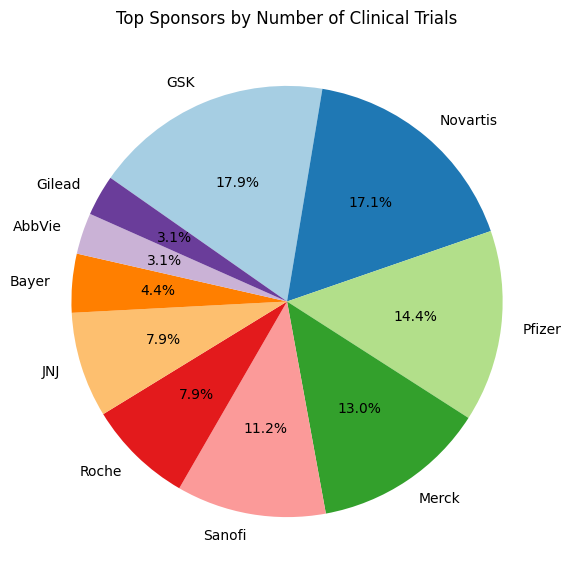

In [27]:
#plot pie chart of top sponsors
plt.figure(figsize=(14,7))
plt.pie(top_sponsor, 
        labels=top_sponsor.index, 
        autopct="%1.1f%%", 
        startangle=145, 
        colors=plt.cm.Paired.colors,
        counterclock=False)

#add title
plt.title("Top Sponsors by Number of Clinical Trials")

# Show the pie chart
plt.show()

In [28]:
# Count number of trials per sponsor per year
sponsor_trends = df.groupby(["Start_Year", "Sponsor"])["NCT"].count().unstack().fillna(0)


In [29]:
sponsor_trends

Sponsor,AbbVie,Bayer,GSK,Gilead,JNJ,Merck,Novartis,Pfizer,Roche,Sanofi
Start_Year,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1985,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1988,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
1990,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1991,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1992,0.0,0.0,4.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0
1993,0.0,0.0,2.0,0.0,6.0,0.0,0.0,2.0,0.0,1.0
1994,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


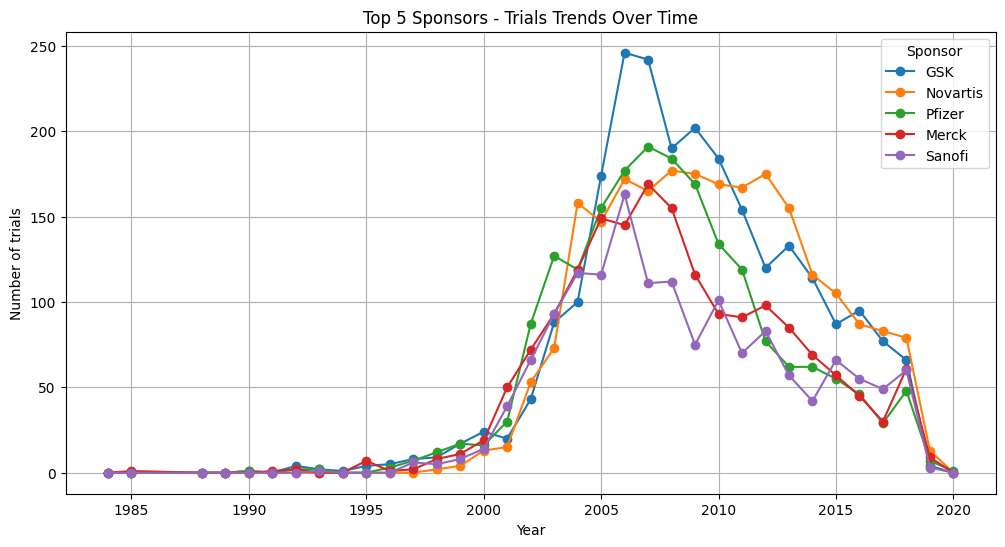

In [30]:
#plot sponsor activity over time(top 5 sponsors)
top_5_sponsors = top_sponsor.index[:5]
sponsor_trends[top_5_sponsors].plot(figsize=(12,6), marker="o")
plt.xlabel("Year")
plt.ylabel("Number of trials")
plt.title("Top 5 Sponsors - Trials Trends Over Time")
plt.legend(title="Sponsor")
plt.grid()
plt.show()


In [31]:
# Count completed trials per sponsor
completed_trials = df[df["Status"] == "Completed"]["Sponsor"].value_counts().head(10)

In [32]:
completed_trials

Sponsor
GSK         2067
Novartis    1728
Pfizer      1450
Merck       1349
Sanofi      1223
JNJ          798
Roche        754
Bayer        448
Gilead       286
AbbVie       247
Name: count, dtype: int64

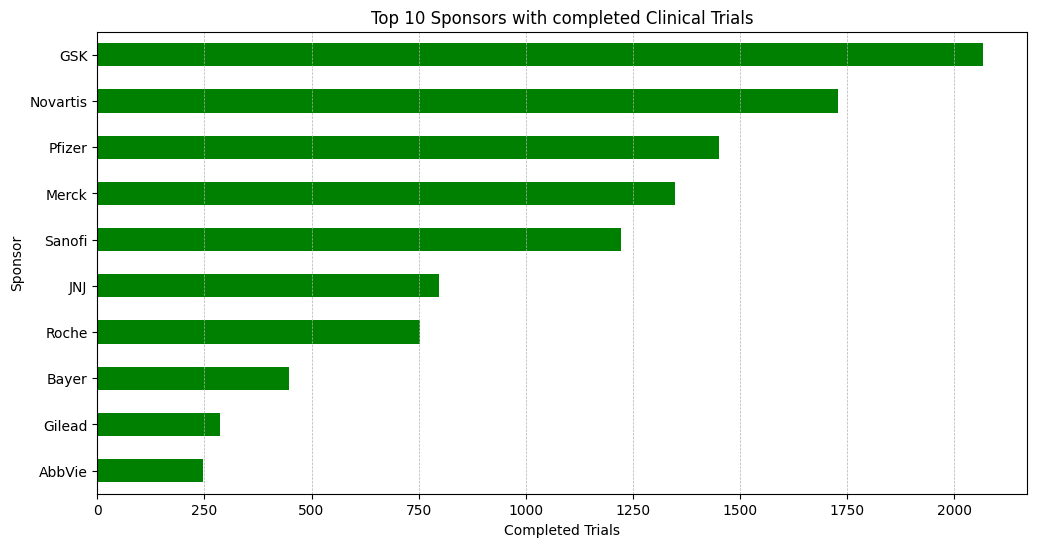

In [33]:
#plot success rates
plt.figure(figsize=(12,6))
completed_trials = completed_trials.sort_values(ascending=True)  # Ensures smallest at bottom, largest at top
completed_trials.plot(kind="barh", color="green")
plt.xlabel("Completed Trials")
plt.ylabel("Sponsor")
plt.title("Top 10 Sponsors with completed Clinical Trials")
plt.xticks(rotation=0, ha="center")
plt.grid(axis="x", linestyle="--", linewidth=0.5)
plt.show()

In [80]:
# Count trials by status for top sponsors
top_sponsors = completed_trials.index
completed = df[df["Status"] == "Completed"].groupby("Sponsor")["NCT"].count().reindex(top_sponsors, fill_value=0)
withdrawn = df[df["Status"] == "Withdrawn"].groupby("Sponsor")["NCT"].count().reindex(top_sponsors, fill_value=0)
withdrawn = withdrawn.sort_values(ascending=False)

In [82]:
withdrawn

Sponsor
GSK         70
Novartis    62
Pfizer      49
Merck       37
Roche       22
JNJ         13
Sanofi      13
Bayer        8
AbbVie       6
Gilead       6
Name: NCT, dtype: int64

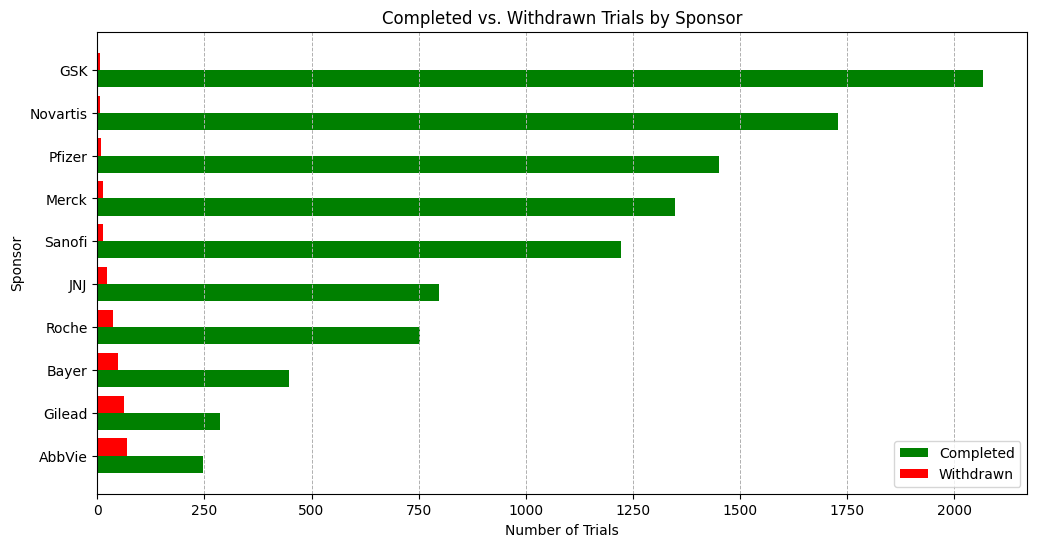

In [84]:
# Plot side-by-side bars
plt.figure(figsize=(12, 6))
bar_width = 0.4
y_pos = np.arange(len(top_sponsors))

plt.barh(y_pos, completed, color="green", label="Completed", height=bar_width)
plt.barh(y_pos + bar_width, withdrawn, color="red", label="Withdrawn", height=bar_width)

plt.xlabel("Number of Trials")
plt.ylabel("Sponsor")
plt.title("Completed vs. Withdrawn Trials by Sponsor")
plt.yticks(y_pos + bar_width / 2, top_sponsors)
plt.grid(axis="x", linestyle="--", linewidth=0.7)
plt.legend()

plt.show()

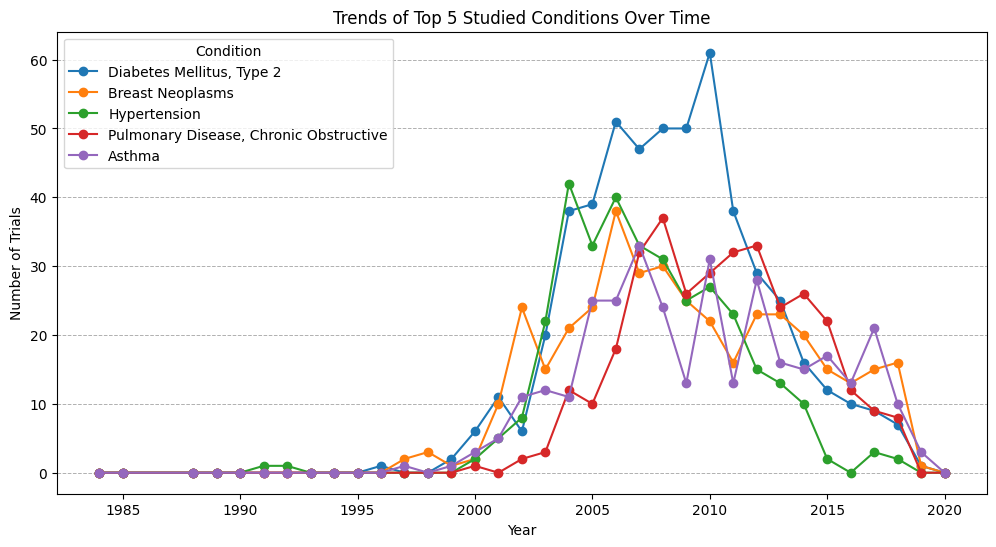

In [86]:
# Group by Year & Condition
condition_trends = df.groupby(["Start_Year", "Condition"])["NCT"].count().unstack().fillna(0)

# Get the top 5 conditions from Step 1
top_5_conditions = top_conditions.index[:5]

# Plot trend for the top 5 conditions
condition_trends[top_5_conditions].plot(figsize=(12, 6), marker="o")

plt.xlabel("Year")
plt.ylabel("Number of Trials")
plt.title("Trends of Top 5 Studied Conditions Over Time")
plt.legend(title="Condition")
plt.grid(axis="y", linestyle="--", linewidth=0.7)

plt.show()

In [92]:
# List the top 10 most studied conditions
print(df["Condition"].value_counts().head(10))

Condition
Diabetes Mellitus, Type 2                 529
Breast Neoplasms                          388
Hypertension                              338
Pulmonary Disease, Chronic Obstructive    336
Asthma                                    331
Arthritis, Rheumatoid                     329
Influenza, Human                          323
Schizophrenia                             290
Diabetes Mellitus                         262
Alzheimer Disease                         214
Name: count, dtype: int64


In [94]:
condition_name = "Diabetes Mellitus, Type 2"  # Change to any condition of interest

# Filter dataset for only this condition
condition_df = df[df["Condition"] == condition_name]

# Print total number of trials for this condition
print(f"Total trials for {condition_name}: {condition_df.shape[0]}")

Total trials for Diabetes Mellitus, Type 2: 529


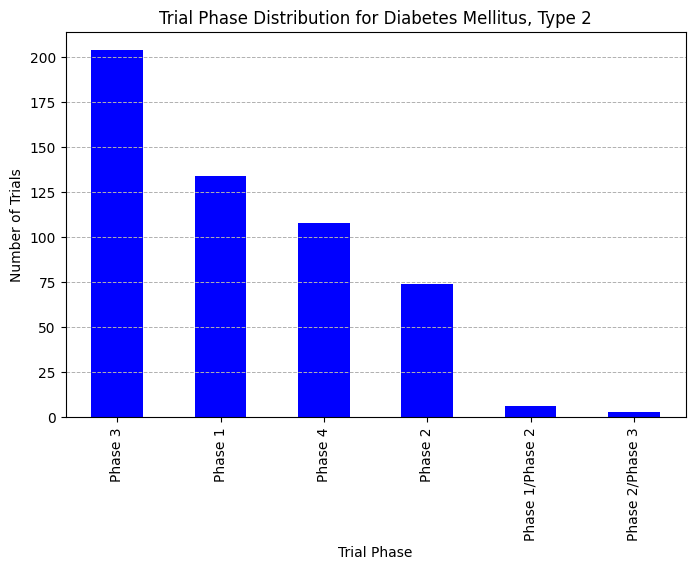

In [96]:
# Count trials by phase
phase_counts = condition_df["Phase"].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 5))
phase_counts.plot(kind="bar", color="blue")

plt.xlabel("Trial Phase")
plt.ylabel("Number of Trials")
plt.title(f"Trial Phase Distribution for {condition_name}")

plt.grid(axis="y", linestyle="--", linewidth=0.7)
plt.show() 

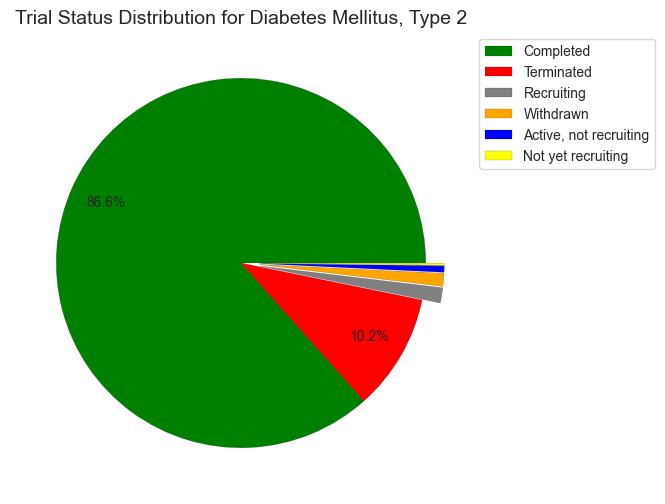

In [244]:
# Count trials by status
status_counts = condition_df["Status"].value_counts()

# Plot pie chart

plt.figure(figsize=(10, 6))
status_counts.plot(
    kind="pie",
    labels=None,
    autopct=lambda p: f"{p:.1f}%" if p > 3 else "",  # Show % only if >3%
    colors=["green", "red", "gray", "orange", "blue", "yellow"],
    startangle=0,  
    textprops={"fontsize": 10},  
    wedgeprops={"linewidth": 0.1, "edgecolor": "black"},  
    explode=[0.1 if p < 3 else 0 for p in status_counts / status_counts.sum() * 100],  # Separate small slices
    pctdistance=0.8,  # Moves % labels closer to slices
    
)

plt.ylabel("")
plt.title(f"Trial Status Distribution for {condition_name}", fontsize=14)

# Add legend outside
plt.legend(status_counts.index, loc="upper left", bbox_to_anchor=(1, 1))

plt.show()